In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('listing_updated_cleaned.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,neighbourhood_group_cleansed,price,number_of_reviews,review_scores_rating,availability_365
0,East Region,48.0,60,4.60,365
1,North-East Region,60.0,82,4.69,244
2,East Region,50.0,10,4.70,365
3,East Region,200.0,369,4.93,362
4,North-East Region,60.0,16,4.81,239


In [5]:
df["estimated_revenue"] = df["price"]*df["availability_365"]

In [8]:
df.head()

,neighbourhood_group_cleansed,price,number_of_reviews,review_scores_rating,availability_365,estimated_revenue,revenue_category
0,East Region,48.0,60,4.60,365,17520.0,low
1,North-East Region,60.0,82,4.69,244,14640.0,low
2,East Region,50.0,10,4.70,365,18250.0,low
3,East Region,200.0,369,4.93,362,72400.0,high
4,North-East Region,60.0,16,4.81,239,14340.0,low


In [7]:
df["revenue_category"] = pd.qcut(df["estimated_revenue"], q=3, labels=["low","mid","high"])

In [43]:
print(df[df['availability_365'] != 365]['revenue_category'].value_counts())

low     130
high    123
mid     110
Name: revenue_category, dtype: int64


In [9]:
feature = ["price","number_of_reviews","availability_365"]

x = df[feature]
y = df["revenue_category"]

In [10]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
    print("=" * 50)
    print(f"{name} Results")

    # Fit model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy & classification report
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Cross-validation (on entire X & y)
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Logistic Regression Results
Test Accuracy: 0.9444
Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.93      0.97        30
         low       0.94      0.97      0.95        30
         mid       0.90      0.93      0.92        30

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90

Cross-Validation Accuracy (5-fold): 0.8838 ± 0.0369
Decision Tree Results
Test Accuracy: 0.9556
Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.97      0.98        30
         low       0.97      0.93      0.95        30
         mid       0.91      0.97      0.94        30

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90

Cross-Validation Accuracy (5-fold): 0.9398 ± 0

In [33]:
model_fix = DecisionTreeClassifier()
model_fix.fit(X_train, y_train)
y_pred_1 = model_fix.predict(X_test)

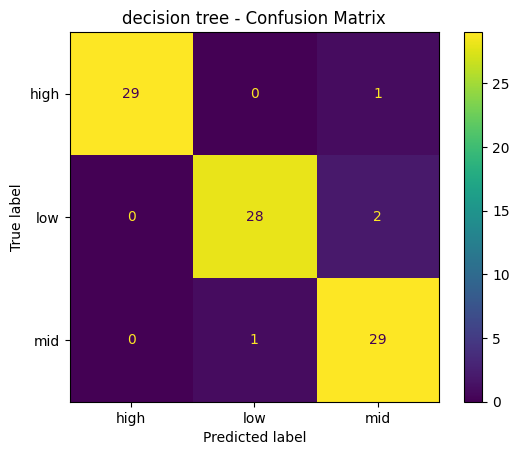

In [39]:
ConfusionMatrixDisplay.from_estimator(model_fix, X_test, y_test)
plt.title("decision tree - Confusion Matrix")
plt.show()

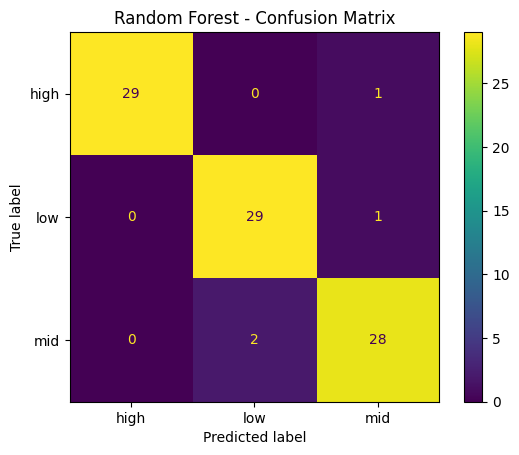

In [37]:
model_fix2 = RandomForestClassifier()
model_fix2.fit(X_train, y_train)
y_pred_2 = model_fix.predict(X_test)

ConfusionMatrixDisplay.from_estimator(model_fix2, X_test, y_test)
plt.title(f"{name} - Confusion Matrix")
plt.show()